Importing the modules

In [487]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [488]:
# reading the dataset
car_dataset = pd.read_csv('archive/train-data.csv')

In [489]:
#checking first 5 data
car_dataset.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [490]:
#checking the numbers of rows and columns
car_dataset.shape

(6019, 14)

In [491]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [492]:
#checking if there are null values or not
car_dataset.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

Display unique values of columns

In [493]:
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Transmission.value_counts())
print(car_dataset.Owner_Type.value_counts())



Fuel_Type
Diesel      3205
Petrol      2746
CNG           56
LPG           10
Electric       2
Name: count, dtype: int64
Transmission
Manual       4299
Automatic    1720
Name: count, dtype: int64
Owner_Type
First             4929
Second             968
Third              113
Fourth & Above       9
Name: count, dtype: int64


Replacing the string format data with numerical data

In [494]:
# as machine learning model will easily predict and test the data in numerical wise data
car_dataset.replace({'Fuel_Type':{'Diesel':0,'Petrol':1,'CNG':2,'LPG':3,'Electric':4}},inplace=True)
car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)
car_dataset.replace({'Owner_Type':{'First':0,'Second':1,'Third':2,'Fourth & Above':3}},inplace=True)

In [495]:
car_dataset.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,2,0,0,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,0,0,0,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,1,0,0,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,0,0,0,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,0,1,1,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


Dropping the rows which contain null values in columns

In [496]:
car_dataset = car_dataset.dropna(subset=['Mileage'])
car_dataset = car_dataset.dropna(subset=['Engine'])
car_dataset = car_dataset.dropna(subset=['Power'])
car_dataset = car_dataset.dropna(subset=['New_Price'])


Splitting  the data into training and testing.

In [497]:
# Here we storing the columns used for training in X(features), by removing some columns we don't have use and one Price column 
# because price column is our target.

# X is input features and Y is target variable 
X = car_dataset.drop(['Name','Price','Location'],axis=1)
Y = car_dataset['Price']

In [499]:
car_dataset.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
2,2,Honda Jazz V,Chennai,2011,46000,1,0,0,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
7,7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,0,1,0,11.36 kmpl,2755 CC,171.5 bhp,8.0,21 Lakh,17.50
10,10,Maruti Ciaz Zeta,Kochi,2018,25692,1,0,0,21.56 kmpl,1462 CC,103.25 bhp,5.0,10.65 Lakh,9.95
15,15,Mitsubishi Pajero Sport 4X4,Delhi,2014,110000,0,0,0,13.5 kmpl,2477 CC,175.56 bhp,7.0,32.01 Lakh,15.00
20,20,BMW 3 Series 320d,Kochi,2014,32982,0,1,0,22.69 kmpl,1995 CC,190 bhp,5.0,47.87 Lakh,18.55


In [500]:
print(X)

      Unnamed: 0  Year  Kilometers_Driven  Fuel_Type  Transmission   
2              2  2011              46000          1             0  \
7              7  2016              36000          0             1   
10            10  2018              25692          1             0   
15            15  2014             110000          0             0   
20            20  2014              32982          0             1   
...          ...   ...                ...        ...           ...   
5999        5999  2016              10000          1             0   
6002        6002  2011              38000          1             0   
6005        6005  2016              37208          0             0   
6010        6010  2013              33746          1             0   
6014        6014  2014              27365          0             0   

      Owner_Type     Mileage   Engine       Power  Seats   New_Price  
2              0   18.2 kmpl  1199 CC    88.7 bhp    5.0   8.61 Lakh  
7              0 

In [501]:
print(Y)

2        4.50
7       17.50
10       9.95
15      15.00
20      18.55
        ...  
5999     4.00
6002     3.25
6005     7.43
6010     3.20
6014     4.75
Name: Price, Length: 823, dtype: float64


Split the dataset into training and testing sets.

In [502]:
X_train,X_test,Y_train,Y_Test = train_test_split(X,Y,test_size=0.1,random_state=2)

# train_test_split() is a function from a machine learning library, such as scikit-learn, used for data splitting.

# test_size=0.1 specifies the proportion of the data to be allocated for testing. In this case, it's set to 0.1,
#  which means 10% of the data will be used for testing, and the remaining 90% will be used for training.

# random_state=2 sets the random seed to ensure reproducibility. Using the same random state value will 
# result in the same train-test split every time the code is run.

The training sets (X_train and Y_train) will contain 90% of the original data, and the testing sets (X_test and Y_Test) will contain 10% of the original data.

*****************************************************************************************************************************

Removing the units of columns data to make it numerical

In [503]:
X_train['Mileage'] = X_train['Mileage'].str.replace(' kmpl', '').str.replace(' km/kg', '').astype(float)
X_train['Engine'] = X_train['Engine'].str.replace(' CC', '').astype(int)
X_train['Power'] = X_train['Power'].str.replace(' bhp', '').astype(float)
X_train['New_Price'] = X_train['New_Price'].str.replace(' Lakh', '').str.replace(' Cr', '').astype(float)

Applying the Linear Regression Model

In [504]:
lin_reg_model = LinearRegression()

Fitting the training data in machine learning model

In [505]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

Predicting using linear model

In [506]:
training_data_prediction = lin_reg_model.predict(X_train)

Calculating the average accuracy using R squared Error techique

In [507]:
error_score = metrics.r2_score(Y_train,training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.7232804687189405


Visualising the data using scatter plot

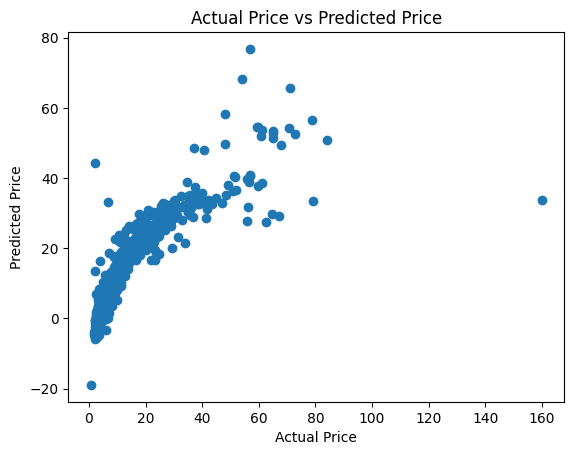

In [508]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

In [509]:
X_test['Mileage'] = X_test['Mileage'].str.replace(' kmpl', '').str.replace(' km/kg', '').astype(float)
X_test['Engine'] = X_test['Engine'].str.replace(' CC', '').astype(int)
X_test['Power'] = X_test['Power'].str.replace(' bhp', '').astype(float)
X_test['New_Price'] = X_test['New_Price'].str.replace(' Lakh', '').str.replace(' Cr', '').astype(float)

In [510]:
testing_data_prediction = lin_reg_model.predict(X_test)

In [511]:
error_score = metrics.r2_score(Y_Test,testing_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.5076563542915116


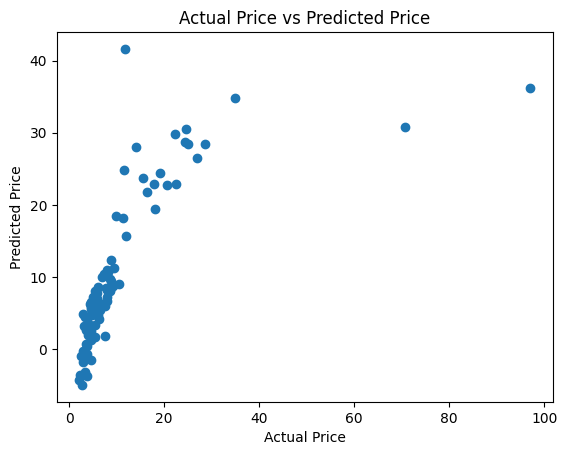

In [512]:
plt.scatter(Y_Test,testing_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

********************************************************************************************************

Training the model using Lasso, a machine learning algo

In [513]:
lass_reg_model = Lasso()

In [514]:
lass_reg_model.fit(X_train,Y_train)

Lasso()

In [515]:
training_data_prediction = lass_reg_model.predict(X_train)

In [516]:
error_score = metrics.r2_score(Y_train,training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.718329241713954


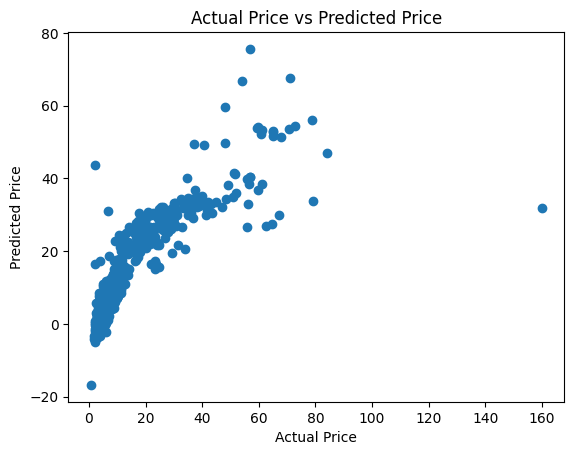

In [517]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

In [518]:
testing_data_prediction = lass_reg_model.predict(X_test)

In [519]:
error_score = metrics.r2_score(Y_Test,testing_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.48128953976661903


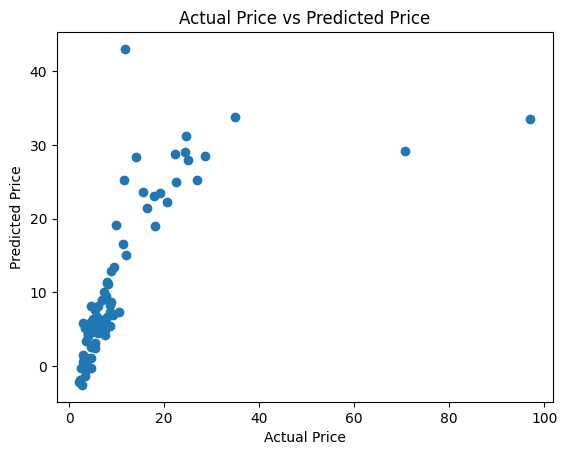

In [520]:
plt.scatter(Y_Test,testing_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()